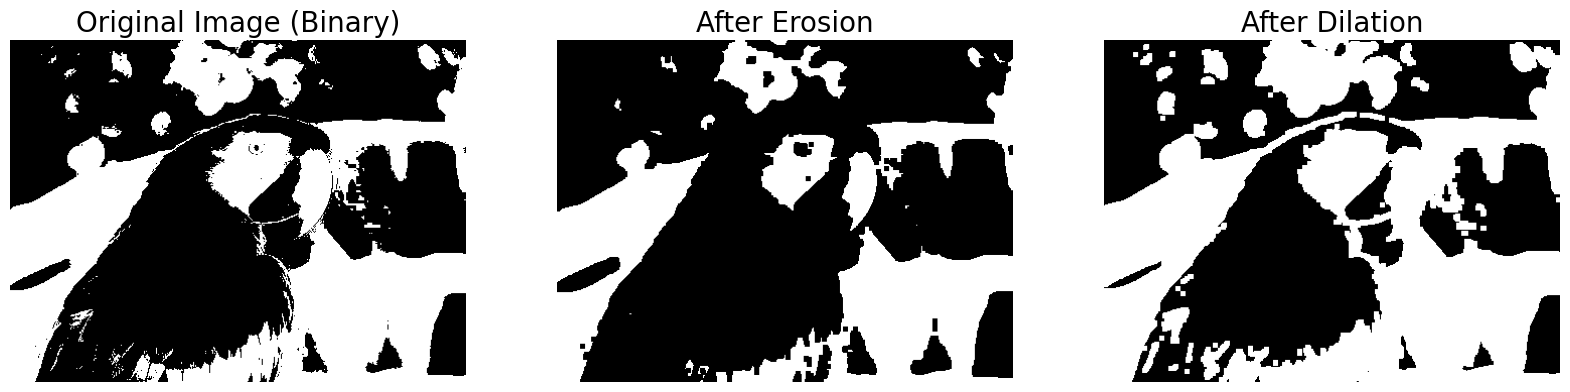

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import filters
import os
import cv2

# Bước 1: Đọc ảnh và chuyển sang grayscale
img = rgb2gray(imread('images/parrot.jpg'))  # Đọc ảnh và chuyển thành grayscale

# Chuyển ảnh thành nhị phân (binary image)
img_binary = img > filters.threshold_otsu(img)  # Sử dụng Otsu's thresholding

# Bước 2: Áp dụng Erosion (xói mòn)
img_erosion = morphology.erosion(img_binary, footprint=np.ones((5, 5)))  # Sử dụng kernel 5x5

# Bước 3: Áp dụng Dilation (mở rộng)
img_dilation = morphology.dilation(img_binary, footprint=np.ones((5, 5)))  # Sử dụng kernel 5x5

# Bước 4: Lưu ảnh
output_folder = 'output_images'
output_path_erosion = os.path.join(output_folder, 'chuong_6_erosion(3).png')
output_path_dilation = os.path.join(output_folder, 'chuong_6_dilation(3).png')

# Lưu ảnh sau khi xử lý
cv2.imwrite(output_path_erosion, np.uint8(img_erosion * 255))  # Lưu ảnh Erosion
cv2.imwrite(output_path_dilation, np.uint8(img_dilation * 255))  # Lưu ảnh Dilation

# Bước 5: Hiển thị ảnh gốc và ảnh đã xử lý
plt.figure(figsize=(20, 10))

# Hiển thị ảnh gốc
plt.subplot(131)
plt.imshow(img_binary, cmap='gray')
plt.axis('off')
plt.title('Original Image (Binary)', size=20)

# Hiển thị ảnh sau Erosion
plt.subplot(132)
plt.imshow(img_erosion, cmap='gray')
plt.axis('off')
plt.title('After Erosion', size=20)

# Hiển thị ảnh sau Dilation
plt.subplot(133)
plt.imshow(img_dilation, cmap='gray')
plt.axis('off')
plt.title('After Dilation', size=20)

plt.show()